# IT 350
## Assignment 1 - Dimensionality Reduction

### Name: Niraj Nandish
### Roll no.: 191IT234

In [1]:
import sys
from math import sqrt

import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

pd.set_option('display.max_rows', 30)

## 1. Download a dataset of your choice

Dataset link - https://www.kaggle.com/iamsouravbanerjee/nifty50-stocks-df

**NOTE** - Rename the `csv` file to `stock.csv`

In [2]:
df = pd.read_csv('stock.csv')
df = df.select_dtypes(exclude=['object'])
print(df)

       Open      High       Low  ...    52w L  365 d % chng  30 d % chng
0     750.0    766.00    713.25  ...   384.40         79.22        -4.65
1    3101.0   3167.35   3091.00  ...  2117.15         45.66         5.66
2     669.0    674.90    660.45  ...   568.40         10.19       -21.49
3    3370.0   3383.50   3320.00  ...  3041.00          9.30       -12.05
4   17200.0  17237.20  16610.00  ...  8273.70         91.38        -9.10
..      ...       ...       ...  ...      ...           ...          ...
45   1544.0   1550.00   1510.15  ...   846.70         76.17        -2.83
46   2377.8   2385.10   2285.05  ...  1300.35         75.45        -6.59
47   7550.0   7599.00   7370.10  ...  4770.00         53.50         1.78
48    726.0    726.00    701.00  ...   414.15         68.06        -1.37
49    632.0    634.40    619.65  ...   346.25         77.51        -7.01

[50 rows x 12 columns]


## 2. Visualize it using multiple dimensions and say why SVD and PCA should be used here

The following df has 12 features with 50 rows. Each of the features are different ways to depict the values of change for different stocks. We need to use PCA and SVD for dimensionality reduction so that we can avoid overfitting when the dataset is trained for a model. There is also chances for the data to be redundant. Using these reduction techniques leads to lesser computational cost for the model and helps in removal of noise thereby improving the overall performance of the model.

## 3a. Implement PCA logic on your own and find the appropriate k-dimensions to represent this data


In [3]:
scalar = StandardScaler()
flag = 1

for c in df.columns:
    std = sqrt(((df[c] - df[c].mean())**2).sum() / df.shape[0])
    if std == 0:
        print("Invalid input")
    df[c] = (df[c] - df[c].mean())/std

if df.shape[0] >= df.shape[1] and flag == 1:
    df.fillna(0, inplace=True)
    means = []
    for c in df.columns:
        test = df[c].mean()
        means.append(test)
    covariance = []
    for j in range(df.shape[1]):
        cov = []
        for k in range(df.shape[1]):
            sum = 0
            for i in range(df.shape[0]):
                sum += (df.iloc[i,j] - means[j]) * (df.iloc[i,k] - means[k])
            result = sum / (df.shape[0]-1)
            cov.append(result)
        covariance.append(cov)
    eigen_values, eigen_vectors = np.linalg.eig(covariance)
    idx = eigen_values.argsort()[::-1]   
    eigen_values = eigen_values[idx]
    eigen_vectors = eigen_vectors[:,idx]
    pc = df.dot(eigen_vectors)
    print("Principle Components using step by step approach: \n")
    pc = np.array(pc)
    print(pc)
    pca = PCA()
    df_scaled = pd.DataFrame(scalar.fit_transform(df), columns=df.columns)
    result = pca.fit_transform(df_scaled)
    print("\nPrinciple Components using built in function: \n")
    print(result)
   

Principle Components using step by step approach: 

[[ 1.22698749e+00 -7.38534155e-01  4.18614594e-01 -1.18079313e+00
   8.70022165e-02 -5.51851932e-02 -5.13284678e-01  2.42828351e-02
  -3.46332439e-02  2.50701999e-03  6.72567811e-04  3.67833608e-04]
 [-2.45921564e-01  1.76609070e+00 -1.01005894e+00 -1.06167594e+00
   2.55267077e-01 -1.89555412e-02 -6.26816325e-02 -2.29498377e-02
  -1.97349787e-02 -6.19441932e-03  2.83446687e-03 -1.98066045e-03]
 [ 1.25934456e+00 -6.10770946e-01  1.20333605e+00  2.00762957e+00
  -5.78136824e-01  5.82907277e-01  4.82582999e-01 -1.37518358e-03
   3.47269604e-02 -1.11085450e-03  5.48040787e-04  9.08052422e-05]
 [-5.01686409e-01  8.77736553e-01  1.12956653e+00  7.48553675e-01
  -4.85694150e-01  4.29639406e-01  3.57885596e-01  9.96231793e-02
  -2.38691638e-02 -5.09197261e-03 -1.29907090e-03  3.25072570e-04]
 [-6.97206821e+00 -2.57358177e+00  2.59056324e-01 -1.07302983e+00
   7.92340915e-01  7.56347455e-01  1.10034895e+00 -6.68654108e-01
  -1.58866319e-02 -7

In [4]:
pca.explained_variance_ratio_

array([5.60901870e-01, 1.87045436e-01, 1.05629426e-01, 6.66227232e-02,
       3.47641348e-02, 2.76054048e-02, 1.56149964e-02, 1.71180554e-03,
       1.01241588e-04, 2.68416795e-06, 2.19702211e-07, 5.79315132e-08])

Below is the plot of how much variance each principle component captures. Since the first 5 features captures about 95 percent of the information, I selected the first 5 features to appropriately represent the data. 

Text(0, 0.5, 'Explained Variance')

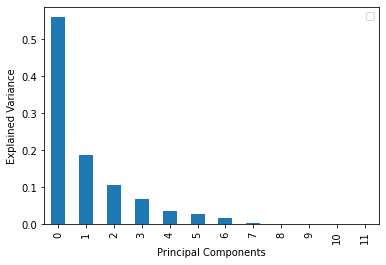

In [5]:
pd.DataFrame(pca.explained_variance_ratio_).plot.bar()
plt.legend('')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance')

## 4a. Visualize the data after applying PCA 

After principal component analysis it was decided to replace the original 12 features of dataset with the new 5 features by retaining 95 percent of the information.

## 3b. Implement SVD logic on your own and find the appropriate k-dimensions to represent this data

In [6]:
def svd(A, tol=1e-5):
    eigs, V = np.linalg.eig(A.T.dot(A))
    sing_vals = np.sqrt(eigs)
    idx = np.argsort(sing_vals)
    sing_vals = sing_vals[idx[::-1]]
    V = V[:, idx[::-1]]
    sing_vals_trunc = sing_vals[sing_vals > tol]
    V = V[:, sing_vals > tol]
    sigma = sing_vals_trunc
    U = A @ V / sing_vals_trunc
    return U.real, sigma.real, V.T.real

In [7]:
def truncate(U, S, V, k):
    U_trunc = U[:, :k]
    S_trunc = S[:k]
    V_trunc = V[:k, :]
    return U_trunc, S_trunc, V_trunc

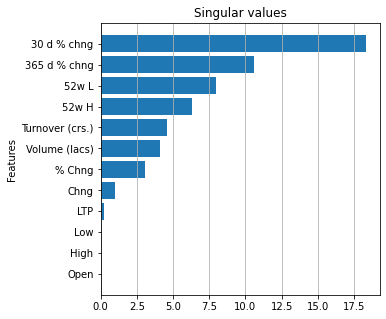

In [8]:
A = df.values
U, S, Vt = svd(A)
plt.figure(figsize=(5, 5))
plt.barh(df.columns[:12], S[::-1])
plt.ylabel("Features")
plt.title("Singular values")
plt.gca().xaxis.grid(True)






####Here we will take the first 7 singular values, ie. the first 7 features in the bar graph shown above.

## 4b. Visualize the data after applying SVD

The dataset is reduced to 7 features namely 30d % chng, 365d % chng, 52w L, 52w H, Turnover etc. of the stocks. The initial 12 columns of the dataset is reduced to now 7 columns.

## 5. State your conclusions as to how SVD and PCA have helped here

In this dataset, we successfully reduced the number of dimensions using SVD and PCA. After performing reduction, the dataset was reduced to 7 features using SVD and 5 features using PCA, hence making the dataset much more noise free and easier to work with while training the model.